In [1]:
import numpy as np
import pandas as pd

In [2]:
def read_data(file):
    f = open(file)
    lines = f.readlines()
    f.close()
    df = pd.DataFrame([eval(line) for line in lines],columns=['image','c1','c2','c3','c4'])
    return df

In [3]:
clip = read_data('data-RawImage-fullMag-rpi1.csv')
noclip = read_data('data-RawImage-emptyMag-rpi1.csv')

I'm not sure what the last four columns are representing. The only variable one is c3 and it ranges from about 60 to -100. There are a lot of points around -89.

In [4]:
clip.head()

,image,c1,c2,c3,c4
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",101,31,20.943951,0.0
1,"[[134, 135, 137, 138, 137, 136, 133, 131, 128,...",101,31,-62.831853,0.0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",101,31,41.887902,0.0
3,"[[175, 178, 180, 182, 182, 180, 177, 173, 168,...",101,31,52.359878,0.0
4,"[[89, 91, 92, 92, 91, 90, 87, 85, 81, 78, 74, ...",101,31,-68.067841,0.0


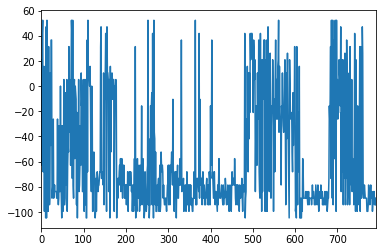

In [40]:
clip['c3'].plot()

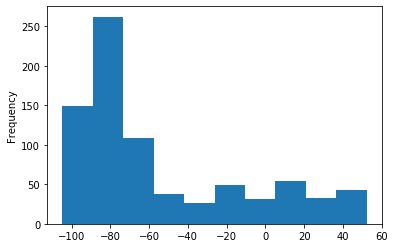

In [79]:
clip['c3'].plot(kind='hist')

There seems to be more image slices around the -80 value for c3

In [135]:
topvals = clip.groupby('c3')['c3'].count().sort_values(ascending=False)
topvals.head()

c3
-89.011792    107
-78.539816     84
-94.247780     75
-83.775804     71
-99.483767     53
Name: c3, dtype: int64

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

In [136]:
def view_top_slices(df,n_slices=5,figsize=(12,3),method=np.median):
    fig,ax = plt.subplots(1,n_slices,figsize=figsize,sharex=True,sharey=True)
    topvals = df.groupby('c3')['c3'].count().sort_values(ascending=False) ## find most common values in c3
    for i,v in enumerate(topvals.index[:n_slices]):
        filt = df[df['c3'].round() == np.round(v)] ## grab all images for c3 value
        imgs = np.array([im for im in filt.image]) ## create array of images at c3 value
        stack = method(imgs,axis=0) ## median stack all images
        ax[i].imshow(stack)
        ax[i].set_title(np.round(v,2))
    plt.show()

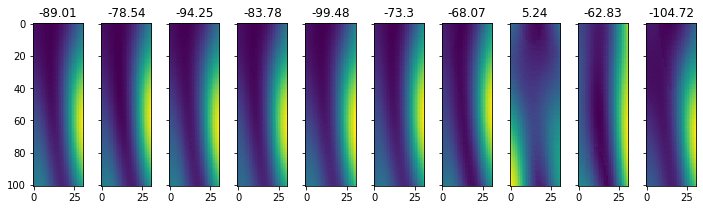

In [139]:
view_top_slices(clip,n_slices=10,method=np.sum)

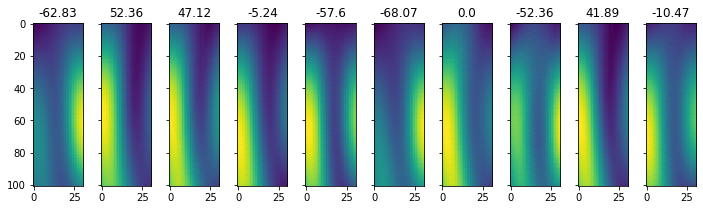

In [142]:
view_top_slices(noclip,n_slices=10,method=np.sum)